# **Rappels de lois statistiques**

**Librairies**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Vocabulaire

- **Variable aléatoire** : Un modèle mathématique abstrait qui associe une valeur numérique à chaque issue possible d'une expérience aléatoire.
- **Expérience aléatoire** : Une action concrète, qu’on peut répéter
- **Réalisation** : Le résultat numérique d’une variable aléatoire après une expérience

### Loi binômiale

La loi binomiale modélise le nombre de succès obtenus lors de $n$ essais indépendants, 
où chaque essai a deux issues possibles : succès (avec une probabilité $p$) ou échec (avec une probabilité $1 - p$).

Chaque essai individuel suit une loi de Bernoulli, qui est un cas particulier de la loi binomiale avec $n = 1$.

Ainsi, la variable binomiale $X$ peut être vue comme la somme de $n$ variables de Bernoulli indépendantes.

On utilise np.random.binomial(nb_essais, probabilite_succes, nb_experiences)

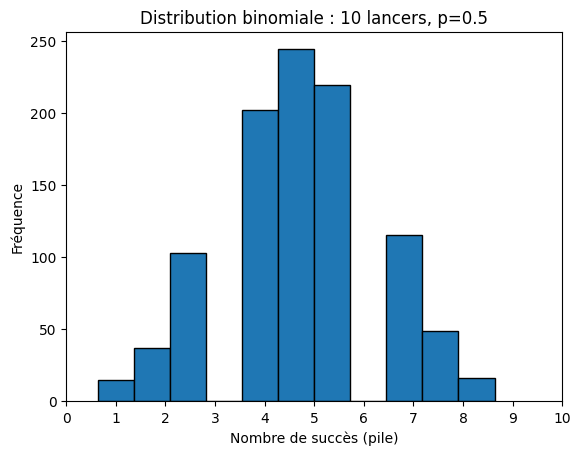

In [ ]:
# Simulation de 1000 expériences suivant la même loi binomiale avec 10 lancers de pièce équitable (p=0.5)
data = np.random.binomial(n=10, p=0.5, size=1000)

plt.hist(data, bins=11, edgecolor='black', align='left')
plt.title("Distribution binomiale : 10 lancers, p=0.5")
plt.xlabel("Nombre de succès (pile)")
plt.ylabel("Fréquence")
plt.xticks(range(11))
plt.show()

### Loi géométrique

La loi géométrique modélise le nombre d’essais nécessaires avant d’obtenir le premier succès dans une suite d’essais indépendants de Bernoulli (succès/échec), avec une probabilité constante de succès p.

On utilise np.random.geometric(p, nb_experiences)

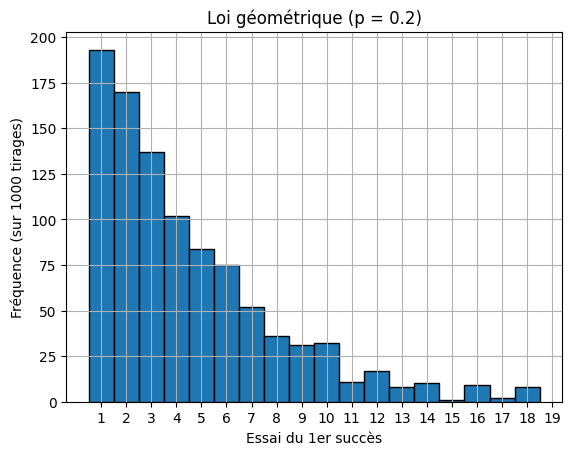

In [4]:
# Simulation de 1000 expériences suivant une loi géométrique : nombre d'essais avant le 1er succès avec probabilité p = 0.2 (dé truqué)
data = np.random.geometric(p=0.2, size=1000)

plt.hist(data, bins=range(1, 20), edgecolor='black', align='left')
plt.title("Loi géométrique (p = 0.2)")
plt.xlabel("Essai du 1er succès")
plt.ylabel("Fréquence (sur 1000 tirages)")
plt.grid(True)
plt.xticks(range(1, 20))
plt.show()

Petit aparté : Une seule variable géométrique a une distribution fortement asymétrique à droite → pas du tout normale.

Mais la moyenne de nombreuses variables géométriques (ou leur somme) tendra vers une loi normale quand n est grand. (Théorème Central limite)

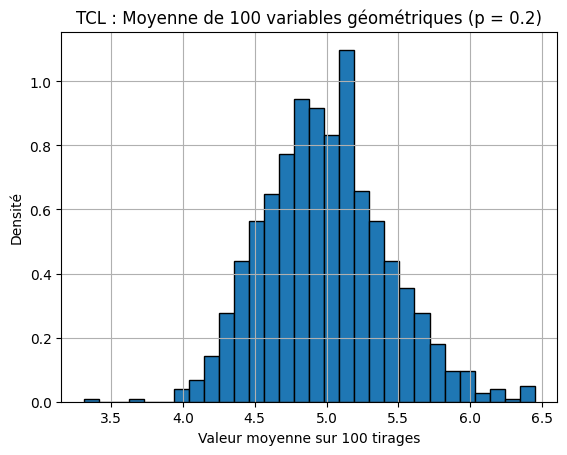

In [ ]:
# Paramètres
p = 0.2                    # Probabilité de succès
n = 100                    # Taille d’un groupe (nombre de tirages géométriques par moyenne)
nb_moyennes = 1000         # Nombre de moyennes à simuler

# Simulation : 1000 moyennes de 100 tirages géométriques
data = np.random.geometric(p=p, size=(nb_moyennes, n)) # Taille de data: (1000 x 100)
moyennes = data.mean(axis=1)

# Visualisation
plt.hist(moyennes, bins=30, edgecolor='black', density=True)
plt.title("TCL : Moyenne de 100 variables géométriques (p = 0.2)")
plt.xlabel("Valeur moyenne sur 100 tirages")
plt.ylabel("Densité")
plt.grid(True)
plt.show()

### Loi de poisson

La loi de Poisson modélise le nombre d'événements rares qui se produisent dans un intervalle donné (temps, espace, etc.), sous les conditions suivantes :

- Les événements sont indépendants,

- Ils arrivent de manière aléatoire mais à une fréquence moyenne constante.

On utilise np.random.poisson(λ, nb_experiences), où :

 - λ (lambda) représente le nombre moyen d'événements attendus dans l'intervalle d'observation.

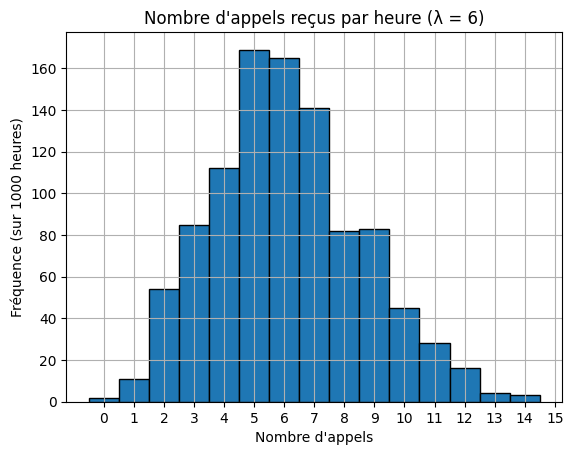

In [16]:
# Paramètres : moyenne λ = 6 appels/heure
lam = 6
size = 1000  # On simule 1000 heures

# Simulation
appels_par_heure = np.random.poisson(lam=lam, size=size)

# Visualisation
plt.hist(appels_par_heure, bins=range(0, 16), edgecolor='black', align='left')
plt.title("Nombre d'appels reçus par heure (λ = 6)")
plt.xlabel("Nombre d'appels")
plt.ylabel("Fréquence (sur 1000 heures)")
plt.xticks(range(0, 16))
plt.grid(True)
plt.show()



### Loi exponentielle

La loi exponentielle modélise le temps d’attente avant qu’un événement aléatoire ne se produise, à condition que :

- Les événements arrivent de façon continue et aléatoire,

- Avec une fréquence moyenne constante dans le temps (paramètre $λ$).

On utilise np.random.exponential($\frac{1}{λ}$, nb_experiences) avec $\frac{1}{λ}$ = temps moyen entre deux événements 

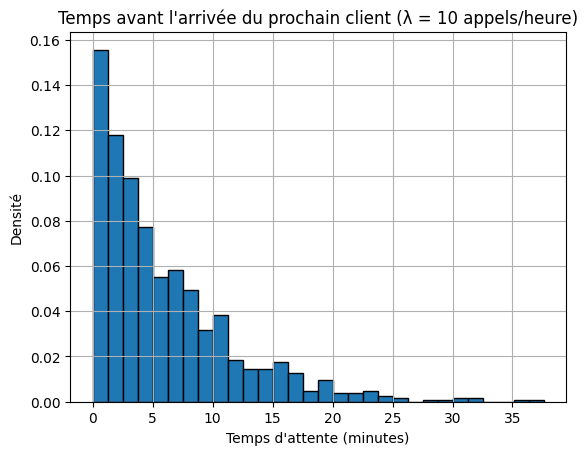

In [31]:
# Paramètre lambda = 10 appels/heure → donc scale = 1 / 10 = 0.1 heures (~6 minutes)
# On génère 1000 temps d'attente entre clients
inter_arrival_times = np.random.exponential(scale=1/10, size=1000)  # en heures

# Convertir en minutes pour que ce soit plus lisible
inter_arrival_times_min = inter_arrival_times * 60

plt.hist(inter_arrival_times_min, bins=30, edgecolor='black', density=True)
plt.title("Temps avant l'arrivée du prochain client (λ = 10 appels/heure)")
plt.xlabel("Temps d'attente (minutes)")
plt.ylabel("Densité")
plt.grid(True)
plt.show()

### Loi uniforme

La loi uniforme modélise une situation où toutes les valeurs dans un intervalle sont également probables.

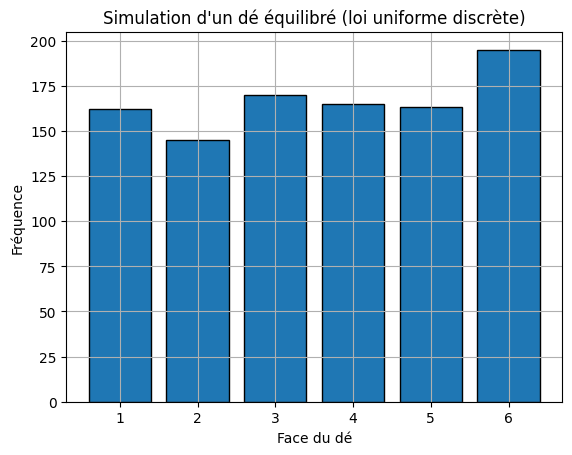

In [ ]:
# un dé équilibré à 6 faces
lancers = np.random.randint(1, 7, size=1000)

plt.hist(lancers, bins=np.arange(1, 8)-0.5, edgecolor='black', align='mid', rwidth=0.8)
plt.title("Simulation d'un dé équilibré (loi uniforme discrète)")
plt.xlabel("Face du dé")
plt.ylabel("Fréquence")
plt.xticks(range(1, 7))
plt.grid(True)
plt.show()

### Loi normale

La loi normale (ou loi de Gauss) est une distribution de probabilité continue en forme de cloche.
Elle est centrée autour d’une moyenne et symétrique, utilisée pour modéliser de nombreux phénomènes naturels.

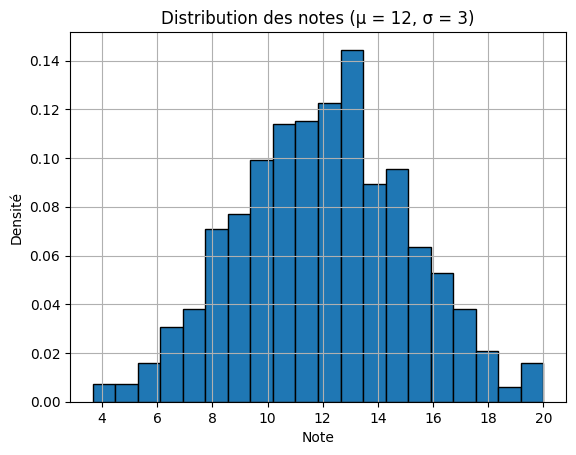

In [8]:
notes = np.random.normal(loc=12, scale=3, size=1000)

# On limite les notes entre 0 et 20
notes = np.clip(notes, 0, 20)

plt.hist(notes, bins=20, edgecolor='black', density=True)
plt.title("Distribution des notes (μ = 12, σ = 3)")
plt.xlabel("Note")
plt.ylabel("Densité")
plt.grid(True)
plt.show()